In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
df.columns = col_names

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [8]:
df['doors'].value_counts()

3        432
4        432
5more    432
2        431
Name: doors, dtype: int64

In [9]:
df['persons'].value_counts()

more    576
4       576
2       575
Name: persons, dtype: int64

In [10]:
df['maint'].value_counts()

low      432
med      432
high     432
vhigh    431
Name: maint, dtype: int64

In [11]:
df['lug_boot'].value_counts()

med      576
big      576
small    575
Name: lug_boot, dtype: int64

In [12]:
df['safety'].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

In [13]:
df['class'] = df['class'].replace({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

In [14]:
df_copy = pd.get_dummies(df)

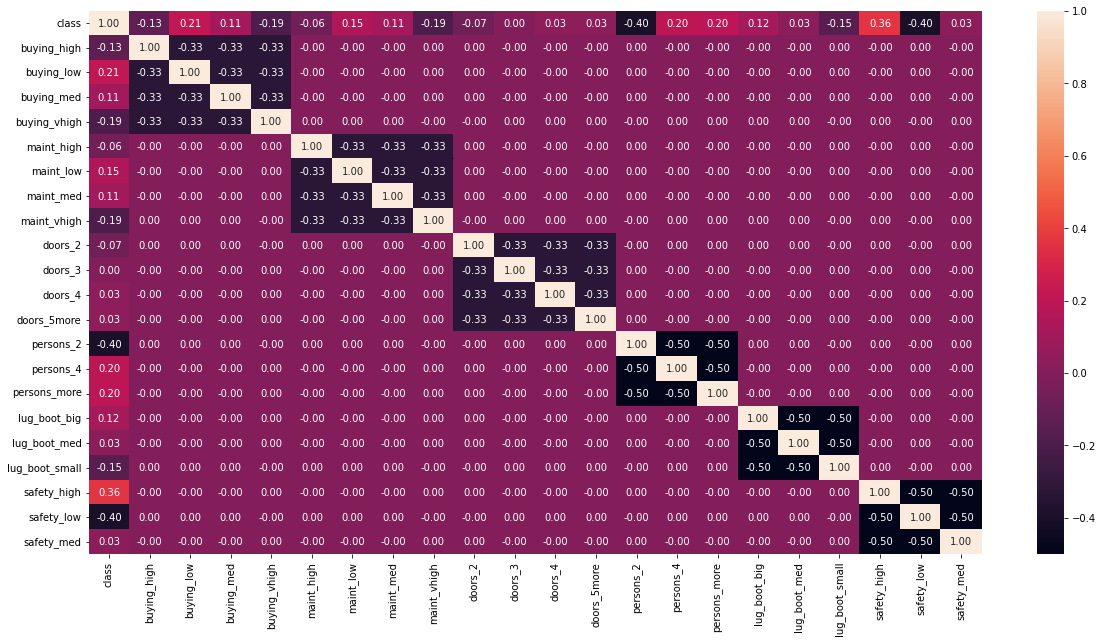

In [15]:
plt.figure(figsize=(20,10))

sns.heatmap(df_copy.corr(), annot=True, fmt='.2f')

In [16]:
y = df['class']
X = df.drop(['class'], axis=1)

In [17]:
X = pd.get_dummies(X)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [20]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [21]:
ctree = dtree()

In [22]:
from sklearn import tree

In [23]:
ctree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(783.1336633663366, 524.1857142857143, 'X[12] <= 0.5\ngini = 0.457\nsamples = 1381\nvalue = [967, 307, 55, 52]'),
 Text(772.0841584158416, 485.3571428571429, 'X[19] <= 0.5\ngini = 0.581\nsamples = 916\nvalue = [502, 307, 55, 52]'),
 Text(761.0346534653464, 446.52857142857147, 'X[7] <= 0.5\ngini = 0.629\nsamples = 618\nvalue = [204, 307, 55, 52]'),
 Text(527.6138613861385, 407.70000000000005, 'X[1] <= 0.5\ngini = 0.626\nsamples = 466\nvalue = [105, 254, 55, 52]'),
 Text(317.6732673267326, 368.8714285714286, 'X[17] <= 0.5\ngini = 0.554\nsamples = 354\nvalue = [100, 212, 19, 23]'),
 Text(193.36633663366337, 330.0428571428572, 'X[2] <= 0.5\ngini = 0.511\nsamples = 237\nvalue = [42, 158, 14, 23]'),
 Text(110.49504950495049, 291.2142857142857, 'X[4] <= 0.5\ngini = 0.38\nsamples = 153\nvalue = [39, 114, 0, 0]'),
 Text(66.29702970297029, 252.3857142857143, 'X[8] <= 0.5\ngini = 0.192\nsamples = 102\nvalue = [11, 91, 0, 0]'),
 Text(33.148514851485146, 213.55714285714288, 'X[9] <= 0.5\ngini 

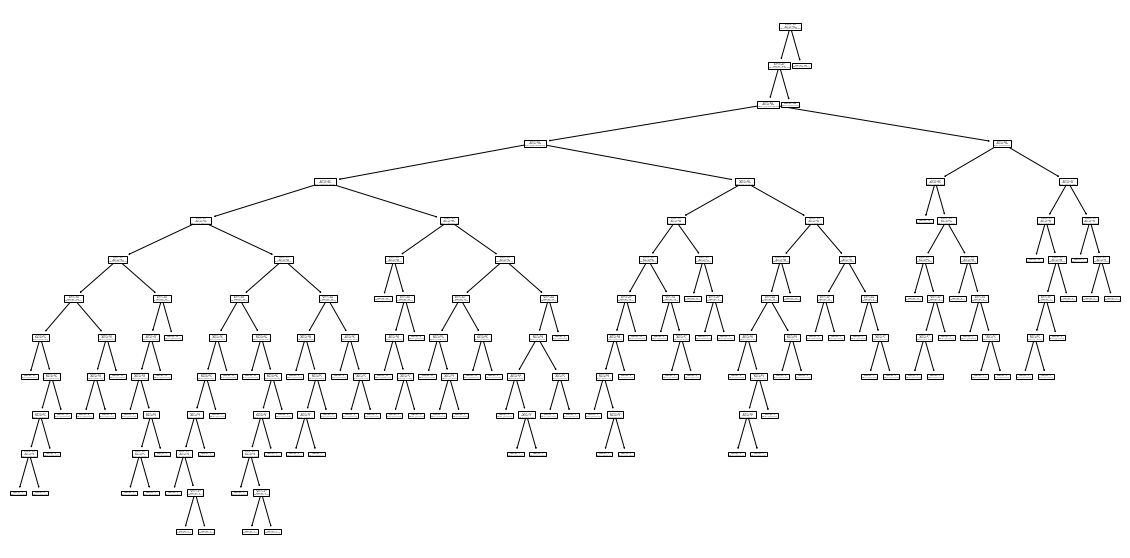

In [24]:
plt.figure(figsize=(20, 10))

tree.plot_tree(ctree.fit(x_train, y_train))

In [25]:
preds = ctree.predict(x_test)
sum(preds == y_test)/len(preds)

0.9624277456647399

In [26]:
preds = ctree.predict(x_train)
sum(preds == y_train)/len(preds)

1.0